Nama : Moh. Aflah Azzaky

Domisili : Sidoarjo

Email : aflahazzaki123@gmail.com

# **Install Library**

In [19]:
!pip install session_info
!pip install sastrawi

# **Import Library**

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import string, nltk, re, csv, requests
import session_info

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# session_info.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Read Dataset**

In [22]:
# Menghubungkan Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/app_review_shopee.csv'
app_review_shopee_df = pd.read_csv(file_path)
app_review_shopee_df.shape
app_review_shopee_df.to_csv(file_path)
# app_review_shopee_df = pd.DataFrame(scrapreview)
number_of_reviews, number_of_column = app_review_shopee_df.shape
print(f'Number of reviews: {number_of_reviews}')
print(f'Number of columns: {number_of_column}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of reviews: 121500
Number of columns: 2


In [23]:
app_review_shopee_df.head()

,Unnamed: 0,Review
0,0,"Aplikasi nggak bisa dibuka, tiap mau masuk tam..."
1,1,"Menurut saya shopee anehh, kenapa? Karena saya..."
2,2,"Saldo Pay harus melebihi nilai pembelian, tida..."
3,3,Makin kesini shopee makin banyak biaya lain²ny...
4,4,Makin kesini makin berat banget Apps Shopee se...


In [24]:
app_review_shopee_df

,Unnamed: 0,Review
0,0,"Aplikasi nggak bisa dibuka, tiap mau masuk tam..."
1,1,"Menurut saya shopee anehh, kenapa? Karena saya..."
2,2,"Saldo Pay harus melebihi nilai pembelian, tida..."
3,3,Makin kesini shopee makin banyak biaya lain²ny...
4,4,Makin kesini makin berat banget Apps Shopee se...
...,...,...
121495,121495,"Dengan adanya shopee belanja jadi mudah,, harg..."
121496,121496,"Senang belanja di shopee. Pengiriman cepat, kw..."
121497,121497,pokokny seneng deh...belanja ga perlu keluar r...
121498,121498,apk nya bagus kok saya bisa belanja dengan mud...


In [25]:
app_review_shopee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121500 entries, 0 to 121499
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  121500 non-null  int64 
 1   Review      121500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


# **Cleaning Dataset**

In [26]:
clean_df = app_review_shopee_df.dropna()

In [27]:
clean_df = clean_df.drop_duplicates()
number_of_reviews_after_removing_duplicates, number_of_column_after_removing_duplicates = clean_df.shape

In [28]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121500 entries, 0 to 121499
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  121500 non-null  int64 
 1   Review      121500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


# **Preprocessing Text**

In [29]:
def cleaningText(text):
  # menghapus mention
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  # menghapus hashtag
  text = re.sub(r'#[A-Za-z0-9]+', '', text)
  # menghapus RT
  text = re.sub(r'RT[\s]', '', text)
  # menghapus link
  text = re.sub(r"http\S+", '', text)
  # menghapus angka
  text = re.sub(r'[0-9]+', '', text)
  # menghapus karakter selain huruf dan angka
  text = re.sub(r'[^\w\s]', '', text)
  # mengganti baris baru dengan spasi
  text = text.replace('\n', ' ')
  # menghapus semua tanda baca
  text = text.translate(str.maketrans('', '', string.punctuation))
  # menghapus karakter spasi dari kiri dan kanan teks
  text = text.strip(' ')
  return text

# Mengubah semua karakter dalam teks menjadi huruf kecil
def casefoldingText(text):
  text = text.lower()
  return text

# Memecah atau membagi string, teks menjadi daftar token
def tokenizingText(text):
  text = word_tokenize(text)
  return text

# Menghapus stopwords dalam teks
def filteringText(text):
  listStopwords = set(stopwords.words('indonesian'))
  listStopwords1 = set(stopwords.words('english'))
  listStopwords.update(listStopwords1)
  listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
  filtered = []
  for txt in text:
      if txt not in listStopwords:
          filtered.append(txt)
  text = filtered
  return text

# Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
def stemmingText(text):
  # Membuat objek stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  # Memecah teks menjadi daftar kata
  words = text.split()
  # Menerapkan stemming pada setiap kata dalam daftar
  stemmed_words = [stemmer.stem(word) for word in words]
  # Menggabungkan kata-kata yang telah distem
  stemmed_text = ' '.join(stemmed_words)
  return stemmed_text

# Mengubah daftar kata menjadi kalimat
def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

In [30]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

# **Cleaning Dataset**

In [31]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['Review'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [32]:
clean_df

,Unnamed: 0,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,0,"Aplikasi nggak bisa dibuka, tiap mau masuk tam...",Aplikasi nggak bisa dibuka tiap mau masuk tamp...,aplikasi nggak bisa dibuka tiap mau masuk tamp...,aplikasi nggak bisa dibuka tiap mau masuk tamp...,"[aplikasi, nggak, bisa, dibuka, tiap, mau, mas...","[aplikasi, nggak, dibuka, masuk, tampilan, apk...",aplikasi nggak dibuka masuk tampilan apk shope...
1,1,"Menurut saya shopee anehh, kenapa? Karena saya...",Menurut saya shopee anehh kenapa Karena saya k...,menurut saya shopee anehh kenapa karena saya k...,menurut saya shopee anehh kenapa karena saya k...,"[menurut, saya, shopee, anehh, kenapa, karena,...","[shopee, anehh, kemarin, beli, nomor, daftarin...",shopee anehh kemarin beli nomor daftarinlogin ...
2,2,"Saldo Pay harus melebihi nilai pembelian, tida...",Saldo Pay harus melebihi nilai pembelian tidak...,saldo pay harus melebihi nilai pembelian tidak...,saldo pay harus melebihi nilai pembelian tidak...,"[saldo, pay, harus, melebihi, nilai, pembelian...","[saldo, pay, melebihi, nilai, pembelian, persi...",saldo pay melebihi nilai pembelian persis nila...
3,3,Makin kesini shopee makin banyak biaya lain²ny...,Makin kesini shopee makin banyak biaya lain²ny...,makin kesini shopee makin banyak biaya lain²ny...,makin kesini shopee makin banyak biaya lain²ny...,"[makin, kesini, shopee, makin, banyak, biaya, ...","[kesini, shopee, biaya, lain²nya, pelanggan, y...",kesini shopee biaya lain²nya pelanggan yg tert...
4,4,Makin kesini makin berat banget Apps Shopee se...,Makin kesini makin berat banget Apps Shopee se...,makin kesini makin berat banget apps shopee se...,makin kesini makin berat banget apps shopee se...,"[makin, kesini, makin, berat, banget, apps, sh...","[kesini, berat, banget, apps, shopee, sekarang...",kesini berat banget apps shopee sekaranglemot ...
...,...,...,...,...,...,...,...,...
121495,121495,"Dengan adanya shopee belanja jadi mudah,, harg...",Dengan adanya shopee belanja jadi mudah hargan...,dengan adanya shopee belanja jadi mudah hargan...,dengan adanya shopee belanja jadi mudah hargan...,"[dengan, adanya, shopee, belanja, jadi, mudah,...","[shopee, belanja, mudah, harganya, terjangkau,...",shopee belanja mudah harganya terjangkau murah...
121496,121496,"Senang belanja di shopee. Pengiriman cepat, kw...",Senang belanja di shopee Pengiriman cepat kwal...,senang belanja di shopee pengiriman cepat kwal...,senang belanja di shopee pengiriman cepat kwal...,"[senang, belanja, di, shopee, pengiriman, cepa...","[senang, belanja, shopee, pengiriman, cepat, k...",senang belanja shopee pengiriman cepat kwalita...
121497,121497,pokokny seneng deh...belanja ga perlu keluar r...,pokokny seneng dehbelanja ga perlu keluar ruma...,pokokny seneng dehbelanja ga perlu keluar ruma...,pokokny seneng dehbelanja ga perlu keluar ruma...,"[pokokny, seneng, dehbelanja, ga, perlu, kelua...","[pokokny, seneng, dehbelanja, rumahpilih, sant...",pokokny seneng dehbelanja rumahpilih santai te...
121498,121498,apk nya bagus kok saya bisa belanja dengan mud...,apk nya bagus kok saya bisa belanja dengan mud...,apk nya bagus kok saya bisa belanja dengan mud...,apk nya bagus kok saya bisa belanja dengan mud...,"[apk, nya, bagus, kok, saya, bisa, belanja, de...","[apk, bagus, belanja, mudah, barang, yg, sesua...",apk bagus belanja mudah barang yg sesuai tglny...


# **Labeling Dataset**

In [33]:
def fetch_lexicon(url):
    lexicon = dict()
    response = requests.get(url)
    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=',')
        for row in reader:
            lexicon[row[0]] = int(row[1])
    else:
        print(f"Failed to fetch lexicon data from {url}")
    return lexicon

# URL untuk kamus kata-kata positif dan negatif
positive_url = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv'
negative_url = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv'

# Mengambil data kamus kata-kata positif dan negatif
lexicon_positive = fetch_lexicon(positive_url)
lexicon_negative = fetch_lexicon(negative_url)

# Cetak hasil untuk memastikan
print("Positive lexicon:", lexicon_positive)
print("Negative lexicon:", lexicon_negative)

Positive lexicon: {'hai': 3, 'merekam': 2, 'ekstensif': 3, 'paripurna': 1, 'detail': 2, 'pernik': 3, 'belas': 2, 'welas': 4, 'kabung': 1, 'rahayu': 4, 'maaf': 2, 'hello': 2, 'promo': 3, 'terimakasih': 5, 'cover': 3, 'mohon': 2, 'mengawal': 2, 'statistik': 1, 'keluangan': 3, 'jalan terbuka': 3, 'banyaknya': 3, 'lebar': 3, 'bentang': 1, 'hendaknya': 1, 'silahkan': 3, 'semboyan': 2, 'ditunggu': 2, 'akses': 2, 'penerangan': 2, 'hi': 1, 'dibantu': 2, 'makasih': 4, 'halo': 1, 'thanks': 3, 'pengembangan': 3, 'diva': 2, 'punya': 3, 'tidak segan': 2, 'detailnya': 1, 'tak segan': 2, 'aktivasi': 2, 'asih': 3, 'kasih sayang': 5, 'kekaguman': 4, 'kehangatan': 4, 'afeksi': 2, 'renjana': 2, 'amor': 2, 'cinta kasih': 5, 'tresna': 2, 'filantropi': 2, 'cintrong': 2, 'suasana (hati)': 1, 'dinamika': 3, 'tuhan': 3, 'merespon': 3, 'makmur': 4, 'suka cita': 4, 'pengguna': 1, 'tunggu': 1, 'lotre': 2, 'nggak': 1, 'kupon': 3, 'terpelihara': 4, 'terawat': 5, 'tersadar': 3, 'tari': 1, 'gejolak': 1, 'kejutan': 3,

In [34]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0

  for word in text:
      # Mengulangi setiap kata dalam teks
      if word in lexicon_positive:
          score += lexicon_positive[word]
      elif word in lexicon_negative:
          score -= lexicon_negative[word]

  # Inisialisasi variabel polaritas
  polarity=''
  # Menentukan polaritas berdasarkan skor sentimen
  if score >= 4:
      polarity = 'positive'
  elif score <= 2:
      polarity = 'negative'
  else:
      polarity = 'neutral'

  return score, polarity

In [35]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    117272
negative      2637
neutral       1591
Name: count, dtype: int64


# **Label Exploration**

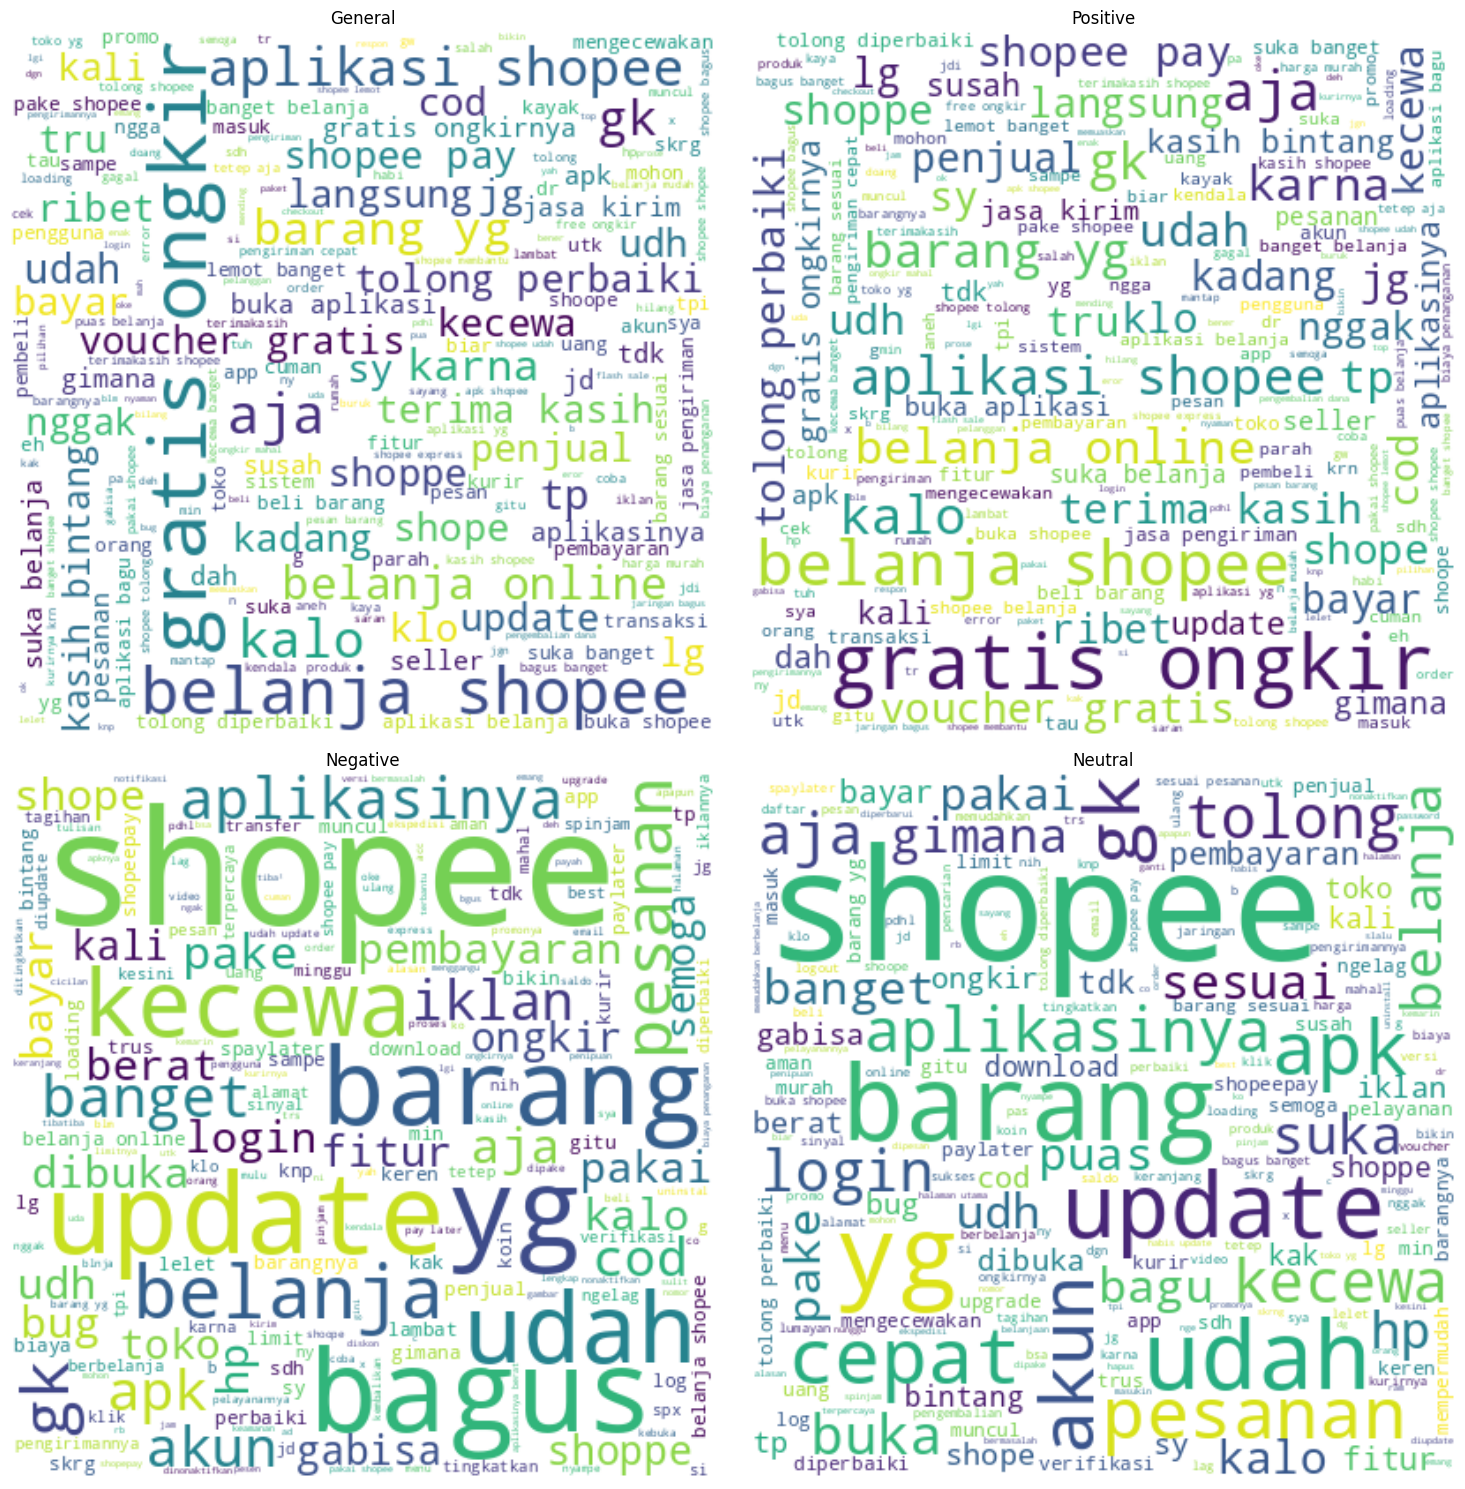

In [36]:
def generate_wordcloud(text):
    return WordCloud(width=400, height=400, background_color='white').generate(text)

def plot_wordclouds(wordclouds, titles):
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    for ax, wordcloud, title in zip(axs.flat, wordclouds, titles):
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Gabungkan semua teks review menjadi satu string untuk setiap kategori
texts = {
    'General': " ".join(review for review in clean_df['text_akhir']),
    'Positive': " ".join(review for review in clean_df[clean_df['polarity'] == 'positive']['text_akhir']),
    'Negative': " ".join(review for review in clean_df[clean_df['polarity'] == 'negative']['text_akhir']),
    'Neutral': " ".join(review for review in clean_df[clean_df['polarity'] == 'neutral']['text_akhir']),
}

# Buat word cloud untuk setiap kategori
wordclouds = {category: generate_wordcloud(text) for category, text in texts.items()}

# Tampilkan word cloud dalam layout 2x2
plot_wordclouds(list(wordclouds.values()), list(wordclouds.keys()))

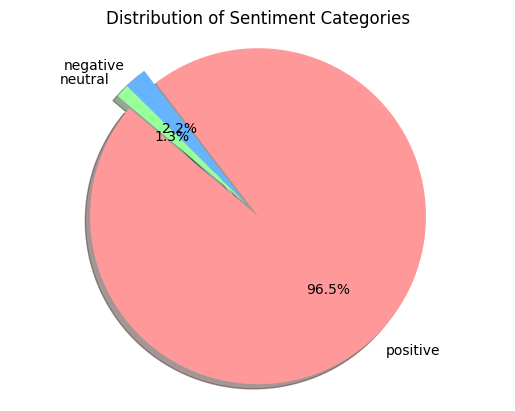

In [37]:
import matplotlib.pyplot as plt

# Hitung jumlah review untuk setiap kategori
category_counts = clean_df['polarity'].value_counts()

# Buat pie chart
labels = category_counts.index
sizes = category_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # Meledakkan bagian pertama (positif)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Pastikan pie chart berbentuk lingkaran

plt.title('Distribution of Sentiment Categories')
plt.show()

# **Data Splitting & Feature Extraction**

In [38]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=10, max_df=0.9 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# **Modeling**

In [39]:
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9874074074074074
Random Forest - accuracy_test: 0.9644444444444444
